# Introduction
## Mortgage Default Risk Prediction

This notebook demonstrates a comprehensive analysis for predicting mortgage default risk using advanced data science techniques.

### Objective
The goal is to develop a robust machine learning model to predict default risk based on borrower and loan attributes. The analysis includes:
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training and Evaluation
- Interpretability Analysis
- Risk Scoring Mechanism

### Dataset Overview
The dataset includes synthetic mortgage performance data with the following key columns:
- **Loan ID**: Unique identifier for each loan.
- **Borrower Age**: Age of the borrower.
- **Income Level**: Annual income of the borrower.
- **Credit Score**: Creditworthiness of the borrower.
- **Loan Amount**: Total loan amount issued.
- **Property Value**: Value of the property for which the loan is issued.
- **Loan-to-Value Ratio**: Ratio of the loan amount to the property value.
- **Employment Status**: Borrower’s employment status (e.g., Employed, Self-employed, etc.).
- **Payment History**: Past payment behavior of the borrower.
- **Economic Indicators**: External economic factors influencing repayment.
- **Default Status**: Target variable indicating whether the borrower defaulted (1) or not (0).

### Approach
1. Preprocess the data to handle missing values, encode categorical variables, and scale features.
2. Perform exploratory data analysis to uncover patterns and insights.
3. Engineer new features to capture important relationships.
4. Train and evaluate multiple models: Logistic Regression, Random Forest, Gradient Boosting, and Neural Network.
5. Analyze model interpretability using SHAP.
6. Develop a risk scoring mechanism and provide actionable recommendations.


## Data Loading and Initial Overview

In [82]:
# Import necessary libraries
#  Load the Dataset
# ----------------------------------------------
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Provide the file paths for the training and testing datasets
train_data_path = "../data/application_train.csv"  # Training dataset
test_data_path = "../data/application_test.csv"  # Testing dataset

# Load the training and testing datasets into pandas DataFrames
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [84]:
# Training Dataset Overview
# ----------------------------------------------
print("Training Dataset Overview:")
print(f"Number of rows: {train_data.shape[0]}")  # Display number of rows in training data
print(f"Number of columns: {train_data.shape[1]}")  # Display number of columns in training data
print("\nFirst few rows of the training dataset:")
display(train_data.head())  # Show the first few rows of the training dataset


Training Dataset Overview:
Number of rows: 307511
Number of columns: 122

First few rows of the training dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Inspection

- Inspect the dataset for missing values and duplicates.
- Analyze the distribution of the target variable in the training data.
- Gain an initial understanding of the features for both datasets.

In [86]:
# Testing Dataset Overview
# ----------------------------------------------
print("\nTesting Dataset Overview:")
print(f"Number of rows: {test_data.shape[0]}")  # Display number of rows in testing data
print(f"Number of columns: {test_data.shape[1]}")  # Display number of columns in testing data
print("\nFirst few rows of the testing dataset:")
display(test_data.head())  # Show the first few rows of the testing dataset


Testing Dataset Overview:
Number of rows: 48744
Number of columns: 121

First few rows of the testing dataset:


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize Missing Values

In [88]:
# Calculate the percentage of missing values in both datasets
missing_train = train_data.isnull().mean() * 100
missing_test = test_data.isnull().mean() * 100

In [90]:
# Display columns with missing values (if any)
print("Columns with Missing Values in Training Dataset:")
display(missing_train[missing_train > 0].sort_values(ascending=False))

Columns with Missing Values in Training Dataset:


COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64

In [92]:
print("\nColumns with Missing Values in Testing Dataset:")
display(missing_test[missing_test > 0].sort_values(ascending=False))


Columns with Missing Values in Testing Dataset:


COMMONAREA_MODE             68.716150
COMMONAREA_MEDI             68.716150
COMMONAREA_AVG              68.716150
NONLIVINGAPARTMENTS_MEDI    68.412523
NONLIVINGAPARTMENTS_AVG     68.412523
                              ...    
OBS_60_CNT_SOCIAL_CIRCLE     0.059495
DEF_30_CNT_SOCIAL_CIRCLE     0.059495
OBS_30_CNT_SOCIAL_CIRCLE     0.059495
AMT_ANNUITY                  0.049237
EXT_SOURCE_2                 0.016412
Length: 64, dtype: float64

In [94]:
# Check if there are duplicate rows in the training dataset
duplicates_train = train_data.duplicated().sum()
print(f"\nNumber of duplicate rows in training dataset: {duplicates_train}")


Number of duplicate rows in training dataset: 0


In [96]:
# Check if there are duplicate rows in the training dataset
duplicates_test = test_data.duplicated().sum()
print(f"\nNumber of duplicate rows in test dataset: {duplicates_test}")


Number of duplicate rows in test dataset: 0


In [98]:
# ----------------------------------------------
# Target Variable Distribution
# ----------------------------------------------
# Analyze the distribution of the target variable
if "TARGET" in train_data.columns:
    target_distribution = train_data["TARGET"].value_counts(normalize=True)
    print("\nTarget Variable Distribution (Training Dataset):")
    print(target_distribution)
else:
    print("\n'TARGET' column is missing in the training dataset.")


Target Variable Distribution (Training Dataset):
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [100]:
# ----------------------------------------------
# Target Variable Distribution
# ----------------------------------------------
# Analyze the distribution of the target variable
if "TARGET" in test_data.columns:
    target_distribution = test_data["TARGET"].value_counts(normalize=True)
    print("\nTarget Variable Distribution (test Dataset):")
    print(target_distribution)
else:
    print("\n'TARGET' column is missing in the test dataset.")


'TARGET' column is missing in the test dataset.


In [102]:
# Display basic statistics of numerical columns in both datasets
print("\nSummary Statistics for Numerical Features in Training Dataset:")
display(train_data.describe())


Summary Statistics for Numerical Features in Training Dataset:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [104]:
print("\nSummary Statistics for Numerical Features in Testing Dataset:")
display(test_data.describe())


Summary Statistics for Numerical Features in Testing Dataset:


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


## Handling Missing Values
     1. Numerical Features: Dropped if >50% missing; median imputation .
    2. Categorical Features: Added "Missing" category if predictive; mode imputation for others.
    3. Result: Dataset cleaned and ready for preprocessing.


In [106]:
# Separate columns by type
numerical_columns = train_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = train_data.select_dtypes(include=["object", "category"]).columns.tolist()

In [108]:
# Analyze missing values
missing_percent = train_data.isnull().mean() * 100
print("Columns with Missing Values (%):")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Columns with Missing Values (%):
COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64


In [110]:
### Numerical Features Handling
### 1. Columns with >50% Missing Values
# Drop numerical columns with too many missing values
threshold = 50  # Drop columns with more than 50% missing
high_missing_numerical = missing_percent[(missing_percent > threshold) & (missing_percent.index.isin(numerical_columns))]
train_data.drop(columns=high_missing_numerical.index, inplace=True)
test_data.drop(columns=high_missing_numerical.index, inplace=True)

In [112]:
## Impute Remaining Numerical Columns
for col in numerical_columns:
    if col in train_data.columns and train_data[col].isnull().sum() > 0:
        median_value = train_data[col].median()
        train_data[col].fillna(median_value, inplace=True)
        test_data[col].fillna(median_value, inplace=True)
        print(f"Imputed '{col}' with median: {median_value}")

Imputed 'AMT_ANNUITY' with median: 24903.0
Imputed 'AMT_GOODS_PRICE' with median: 450000.0
Imputed 'CNT_FAM_MEMBERS' with median: 2.0
Imputed 'EXT_SOURCE_2' with median: 0.5659614260608526
Imputed 'EXT_SOURCE_3' with median: 0.5352762504724826
Imputed 'YEARS_BEGINEXPLUATATION_AVG' with median: 0.9816
Imputed 'FLOORSMAX_AVG' with median: 0.1667
Imputed 'YEARS_BEGINEXPLUATATION_MODE' with median: 0.9816
Imputed 'FLOORSMAX_MODE' with median: 0.1667
Imputed 'YEARS_BEGINEXPLUATATION_MEDI' with median: 0.9816
Imputed 'FLOORSMAX_MEDI' with median: 0.1667
Imputed 'TOTALAREA_MODE' with median: 0.0688
Imputed 'OBS_30_CNT_SOCIAL_CIRCLE' with median: 0.0
Imputed 'DEF_30_CNT_SOCIAL_CIRCLE' with median: 0.0
Imputed 'OBS_60_CNT_SOCIAL_CIRCLE' with median: 0.0
Imputed 'DEF_60_CNT_SOCIAL_CIRCLE' with median: 0.0
Imputed 'DAYS_LAST_PHONE_CHANGE' with median: -757.0
Imputed 'AMT_REQ_CREDIT_BUREAU_HOUR' with median: 0.0
Imputed 'AMT_REQ_CREDIT_BUREAU_DAY' with median: 0.0
Imputed 'AMT_REQ_CREDIT_BUREAU_WE

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_30724\1101701767.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(median_value, inplace=True)
C:\Users\Himanshu\AppData\Local\Temp\ipykernel_30724\1101701767.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [114]:
### Categorical Features Handling
### 1. Correlation Analysis
if "TARGET" in train_data.columns:
    cat_missing_corr = train_data[categorical_columns].isnull().corrwith(train_data["TARGET"])
    print("Correlation of Missingness in Categorical Features with TARGET:")
    print(cat_missing_corr.sort_values(ascending=False))
else:
    print("Target column not found, skipping correlation analysis.")

Correlation of Missingness in Categorical Features with TARGET:
EMERGENCYSTATE_MODE           0.041392
HOUSETYPE_MODE                0.039722
WALLSMATERIAL_MODE            0.039393
FONDKAPREMONT_MODE            0.029476
NAME_TYPE_SUITE              -0.006330
OCCUPATION_TYPE              -0.038690
NAME_CONTRACT_TYPE                 NaN
CODE_GENDER                        NaN
FLAG_OWN_CAR                       NaN
FLAG_OWN_REALTY                    NaN
NAME_INCOME_TYPE                   NaN
NAME_EDUCATION_TYPE                NaN
NAME_FAMILY_STATUS                 NaN
NAME_HOUSING_TYPE                  NaN
WEEKDAY_APPR_PROCESS_START         NaN
ORGANIZATION_TYPE                  NaN
dtype: float64


C:\Users\Himanshu\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Himanshu\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [116]:
# 2. Handle Missing Values Strategically
for col in categorical_columns:
    if col in train_data.columns and train_data[col].isnull().sum() > 0:
        # Check correlation with target
        corr = cat_missing_corr.get(col, 0) if "TARGET" in train_data.columns else 0
        missing_percentage = train_data[col].isnull().mean() * 100

        print(f"\nFeature: {col}")
        print(f"Missing Value Correlation with TARGET: {corr:.4f}")
        print(f"Missing Value Percentage: {missing_percentage:.2f}%")

        if corr > 0.05 or corr < -0.05:
            # If correlated with target, create a "Missing" category
            train_data[col].fillna("Missing", inplace=True)
            test_data[col].fillna("Missing", inplace=True)
            print(f"Handled '{col}' by adding 'Missing' category.")
        else:
            # Otherwise, impute with the mode
            mode_value = train_data[col].mode()[0]
            train_data[col].fillna(mode_value, inplace=True)
            test_data[col].fillna(mode_value, inplace=True)
            print(f"Handled '{col}' by imputing with mode: {mode_value}")


Feature: NAME_TYPE_SUITE
Missing Value Correlation with TARGET: -0.0063
Missing Value Percentage: 0.42%
Handled 'NAME_TYPE_SUITE' by imputing with mode: Unaccompanied

Feature: OCCUPATION_TYPE
Missing Value Correlation with TARGET: -0.0387
Missing Value Percentage: 31.35%
Handled 'OCCUPATION_TYPE' by imputing with mode: Laborers

Feature: FONDKAPREMONT_MODE
Missing Value Correlation with TARGET: 0.0295
Missing Value Percentage: 68.39%
Handled 'FONDKAPREMONT_MODE' by imputing with mode: reg oper account

Feature: HOUSETYPE_MODE
Missing Value Correlation with TARGET: 0.0397
Missing Value Percentage: 50.18%


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_30724\2648060078.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(mode_value, inplace=True)
C:\Users\Himanshu\AppData\Local\Temp\ipykernel_30724\2648060078.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Handled 'HOUSETYPE_MODE' by imputing with mode: block of flats

Feature: WALLSMATERIAL_MODE
Missing Value Correlation with TARGET: 0.0394
Missing Value Percentage: 50.84%
Handled 'WALLSMATERIAL_MODE' by imputing with mode: Panel

Feature: EMERGENCYSTATE_MODE
Missing Value Correlation with TARGET: 0.0414
Missing Value Percentage: 47.40%
Handled 'EMERGENCYSTATE_MODE' by imputing with mode: No


In [118]:
### Validate the Dataset
# Check for remaining missing values
print("\nRemaining Missing Values in Training Data:")
print(train_data.isnull().sum().sort_values(ascending=False).head(10))

print("\nRemaining Missing Values in Test Data:")
print(test_data.isnull().sum().sort_values(ascending=False).head(10))


Remaining Missing Values in Training Data:
SK_ID_CURR                  0
OBS_30_CNT_SOCIAL_CIRCLE    0
FLAG_DOCUMENT_5             0
FLAG_DOCUMENT_4             0
FLAG_DOCUMENT_3             0
FLAG_DOCUMENT_2             0
DAYS_LAST_PHONE_CHANGE      0
DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
dtype: int64

Remaining Missing Values in Test Data:
SK_ID_CURR                  0
FLAG_DOCUMENT_7             0
FLAG_DOCUMENT_5             0
FLAG_DOCUMENT_4             0
FLAG_DOCUMENT_3             0
FLAG_DOCUMENT_2             0
DAYS_LAST_PHONE_CHANGE      0
DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
dtype: int64


## Exploratory Data Analysis (EDA)

1) Analyze feature distributions.
2) Identify relationships with the target (Default Status).
3) Explore feature interactions for engineering and modeling.

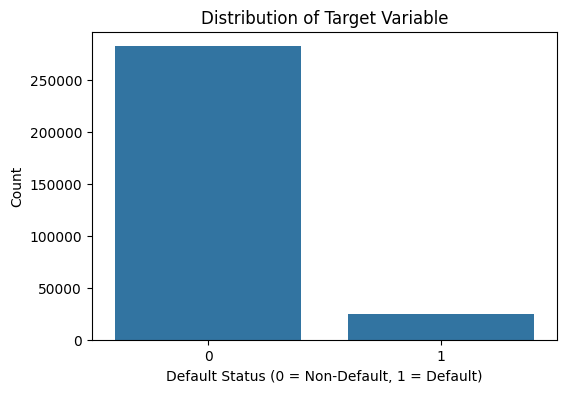

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

### Univariate Analysis
# Distribution of the Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x="TARGET", data=train_data)
plt.title("Distribution of Target Variable")
plt.xlabel("Default Status (0 = Non-Default, 1 = Default)")
plt.ylabel("Count")
plt.savefig("output_plots/target_distribution.png")
plt.show()


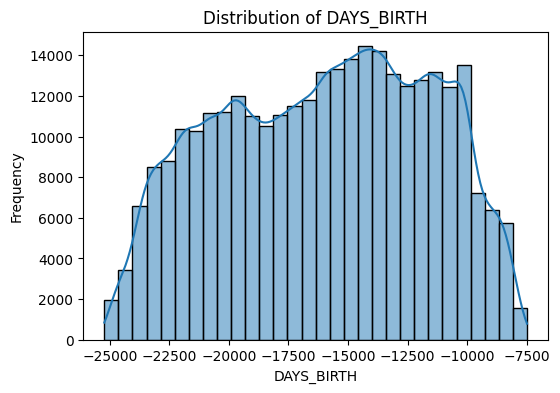

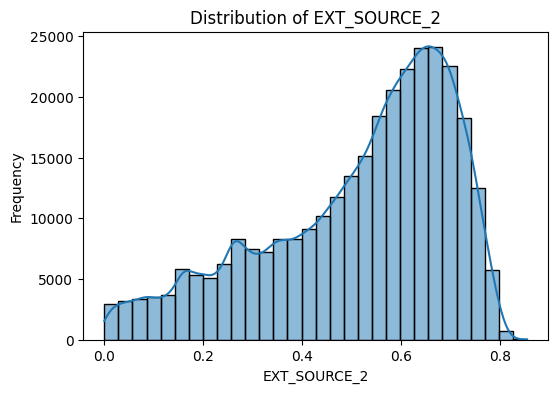

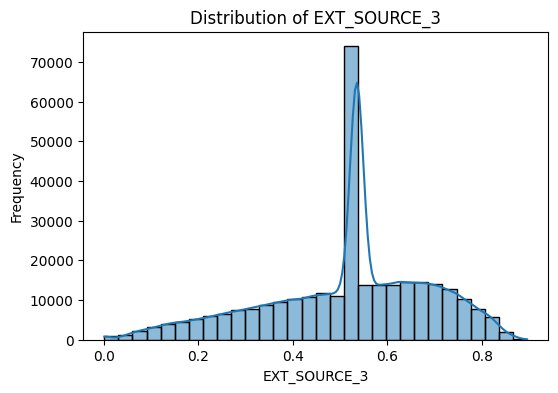

In [102]:
# Distribution of Top Numerical Features
top_numerical_features = ["DAYS_BIRTH", "EXT_SOURCE_2", "EXT_SOURCE_3"]
for feature in top_numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[feature], kde=True, bins=30)
    plt.title(f"Distribution otop_numerical_featuresf {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.savefig(f"output_plots/{feature}_distribution.png")
    plt.show()

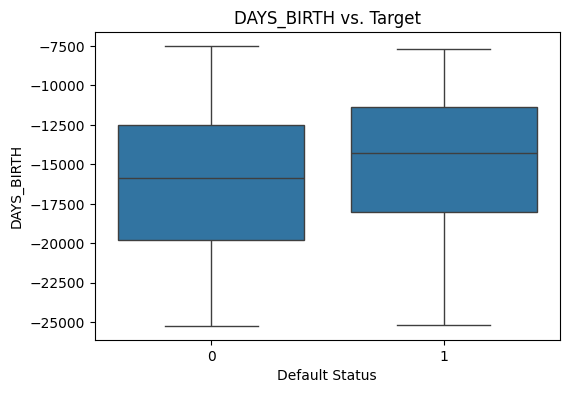

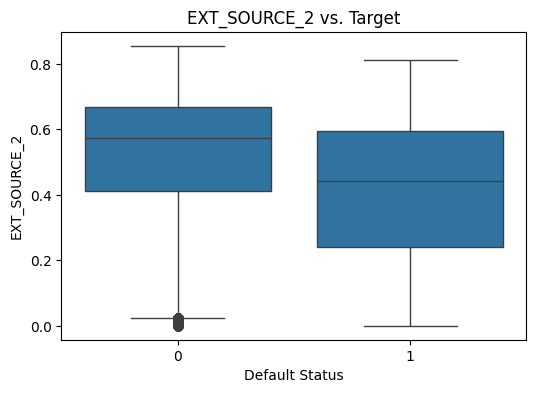

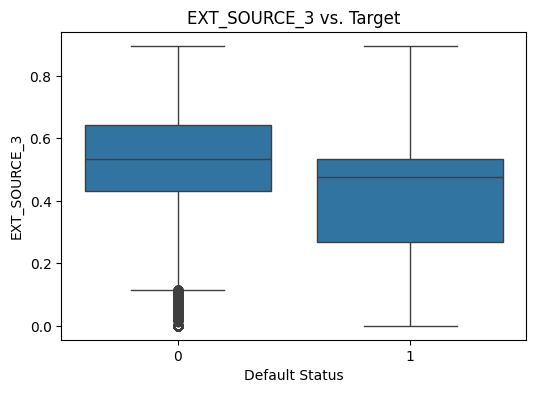

In [104]:
### Bivariate Analysis
# Boxplots of Existing Features with Target
for feature in top_numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="TARGET", y=feature, data=train_data)
    plt.title(f"{feature} vs. Target")
    plt.xlabel("Default Status")
    plt.ylabel(feature)
    plt.savefig(f"output_plots/{feature}_vs_target.png")
    plt.show()

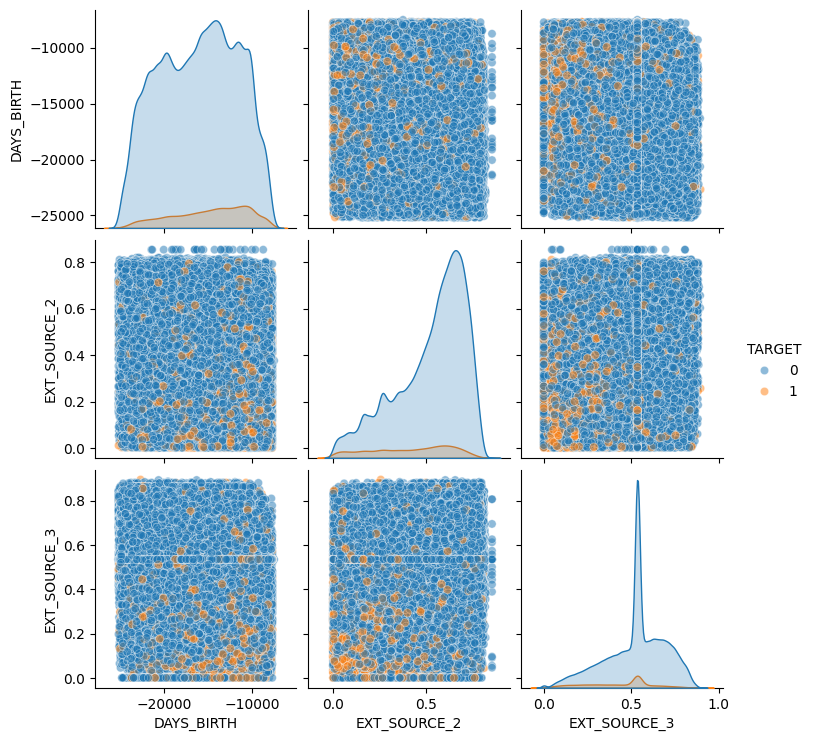

In [106]:
### Multivariate Analysis
# Pairplot for Selected Features
selected_features = top_numerical_features + ["TARGET"]
sns.pairplot(train_data[selected_features], hue="TARGET", diag_kind="kde", plot_kws={"alpha": 0.5})
plt.savefig("output_plots/pairplot_selected_features.png")
plt.show()

### Heatmap of Correlated Features

1) Shows correlations (|correlation| > 0.05) with the target (default status).
2) Strong porsitive/negative correlations with the target.

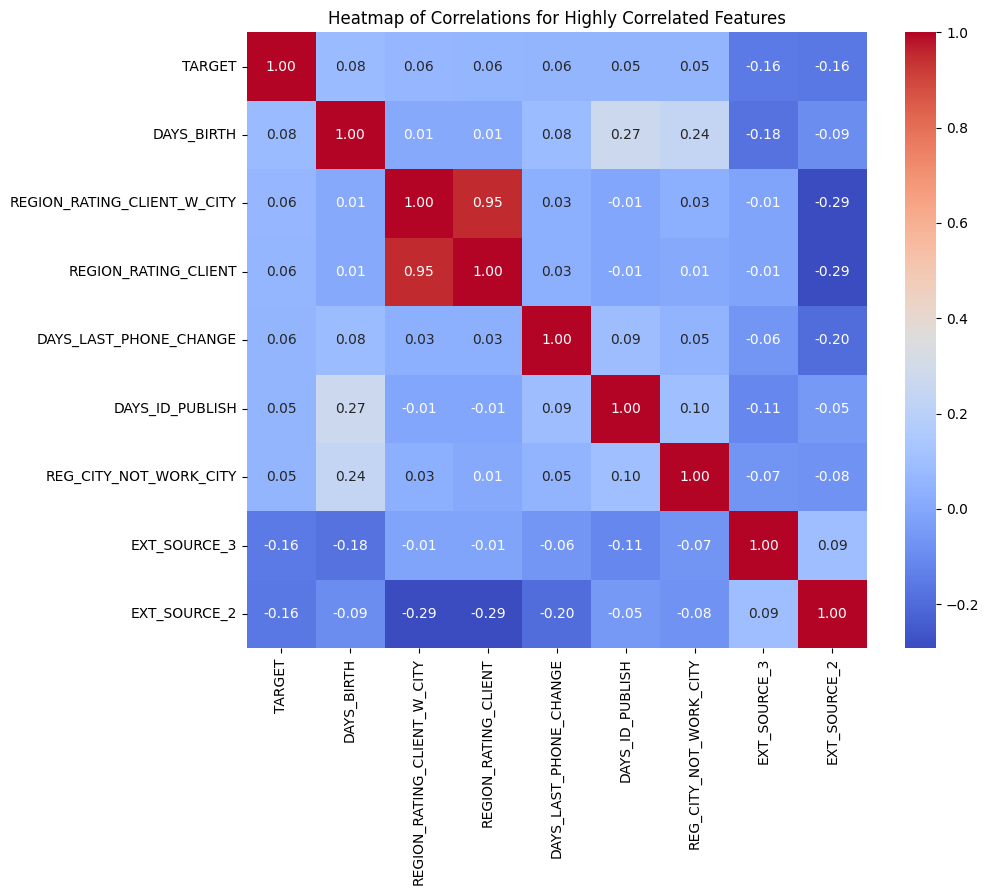

In [123]:
### Correlation Heatmap for Highly Correlated Features

# Ensure only numeric columns are used for correlation
numeric_data = train_data.select_dtypes(include=["float64", "int64"])

# Calculate correlation matrix for numerical features
correlation_matrix = numeric_data.corr()

# Filter correlations with the target variable
target_correlations = correlation_matrix["TARGET"].sort_values(ascending=False)

# Select top features correlated with the target (absolute value > 0.05 for example)
correlated_features = target_correlations[target_correlations.abs() > 0.05].index.tolist()

# Heatmap for Top Correlated Features
plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_data[correlated_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Heatmap of Correlations for Highly Correlated Features")
plt.savefig("output_plots/correlation_heatmap.png")
plt.show()


### Feature Engineering

1. DEBT_TO_INCOME_RATIO: Loan Amount / Income Level.
2. CREDIT_UTILIZATION_RATIO: Loan Amount / Property Value.
3. ECONOMIC_STRESS_INDICATOR: Combines debt-to-income and credit utilization.

In [125]:
# Derived Features: Debt-to-Income Ratio, Credit Utilization, and Economic Stress Indicator

# Check for necessary columns for derived features
required_columns = ["AMT_CREDIT", "AMT_INCOME_TOTAL", "AMT_GOODS_PRICE", "AMT_ANNUITY"]

# Create Debt-to-Income Ratio
train_data["DEBT_TO_INCOME_RATIO"] = train_data["AMT_CREDIT"] / train_data["AMT_INCOME_TOTAL"]
test_data["DEBT_TO_INCOME_RATIO"] = test_data["AMT_CREDIT"] / test_data["AMT_INCOME_TOTAL"]

# Create Credit Utilization Ratio
train_data["CREDIT_UTILIZATION_RATIO"] = train_data["AMT_CREDIT"] / train_data["AMT_GOODS_PRICE"]
test_data["CREDIT_UTILIZATION_RATIO"] = test_data["AMT_CREDIT"] / test_data["AMT_GOODS_PRICE"]

# Create Economic Stress Indicator
train_data["ECONOMIC_STRESS_INDICATOR"] = train_data["DEBT_TO_INCOME_RATIO"] * train_data["CREDIT_UTILIZATION_RATIO"]
test_data["ECONOMIC_STRESS_INDICATOR"] = test_data["DEBT_TO_INCOME_RATIO"] * test_data["CREDIT_UTILIZATION_RATIO"]



In [127]:
# Display summary statistics for derived features
print("Summary statistics for derived features (train):")
display(train_data[["DEBT_TO_INCOME_RATIO", "CREDIT_UTILIZATION_RATIO", "ECONOMIC_STRESS_INDICATOR"]].describe())

Summary statistics for derived features (train):


,DEBT_TO_INCOME_RATIO,CREDIT_UTILIZATION_RATIO,ECONOMIC_STRESS_INDICATOR
count,307511.000000,307511.000000,307511.000000
mean,3.957570,1.122542,4.467421
std,2.689728,0.125542,3.103958
min,0.004808,0.150000,0.005950
25%,2.018667,1.000000,2.250000
50%,3.265067,1.118800,3.667514
75%,5.159880,1.198000,5.892580
max,84.736842,6.000000,84.736842


In [129]:
# Check for missing or infinite values in the derived features
print("\nMissing values in derived features:")
print(train_data[["DEBT_TO_INCOME_RATIO", "CREDIT_UTILIZATION_RATIO", "ECONOMIC_STRESS_INDICATOR"]].isnull().sum())


Missing values in derived features:
DEBT_TO_INCOME_RATIO         0
CREDIT_UTILIZATION_RATIO     0
ECONOMIC_STRESS_INDICATOR    0
dtype: int64


### Outlier Detection and Treatment
1. Identify outliers using the 1.5×IQR rule.
2. Apply capping or removal where necessary.

In [131]:
# Identify outliers using the 1.5×IQR rule
outlier_summary = []

for col in ["DEBT_TO_INCOME_RATIO", "CREDIT_UTILIZATION_RATIO", "ECONOMIC_STRESS_INDICATOR"]:  # Add key numerical features
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(train_data)) * 100

    outlier_summary.append({"Feature": col, "Outliers": len(outliers), "Outlier_Percentage": outlier_percentage})

    # Apply capping
    train_data[col] = np.clip(train_data[col], lower_bound, upper_bound)
    test_data[col] = np.clip(test_data[col], lower_bound, upper_bound)

# Display outlier summary
outlier_df = pd.DataFrame(outlier_summary)
print("Outlier Summary:")
display(outlier_df)


Outlier Summary:


,Feature,Outliers,Outlier_Percentage
0,DEBT_TO_INCOME_RATIO,11510,3.742956
1,CREDIT_UTILIZATION_RATIO,2976,0.967770
2,ECONOMIC_STRESS_INDICATOR,11042,3.590766


- > cap outleiers for `DEBT_TO_INCOME_RATIO` and `ECONOMIC_STRESS_INDICATOR` to limit their influence as ~3.74% is a moderate percentage
- > retain outliers for `CREDIT_UTILIZATION_RATIO` as they represent real-world scenarios.


In [133]:
# Capping outliers for DEBT_TO_INCOME_RATIO and ECONOMIC_STRESS_INDICATOR
import numpy as np
for col in ["DEBT_TO_INCOME_RATIO", "ECONOMIC_STRESS_INDICATOR"]:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping
    train_data[col] = np.clip(train_data[col], lower_bound, upper_bound)
    test_data[col] = np.clip(test_data[col], lower_bound, upper_bound)


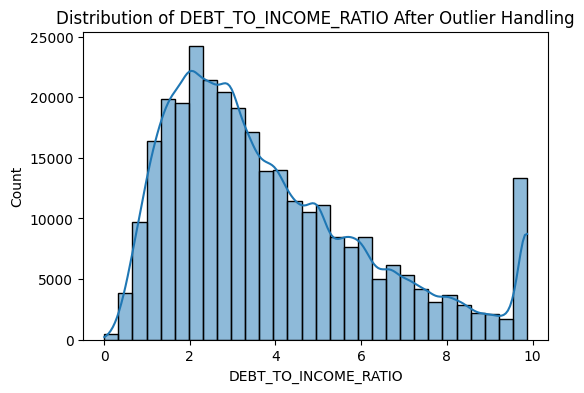

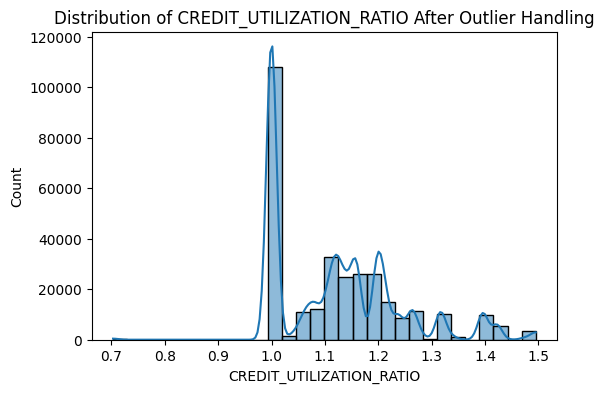

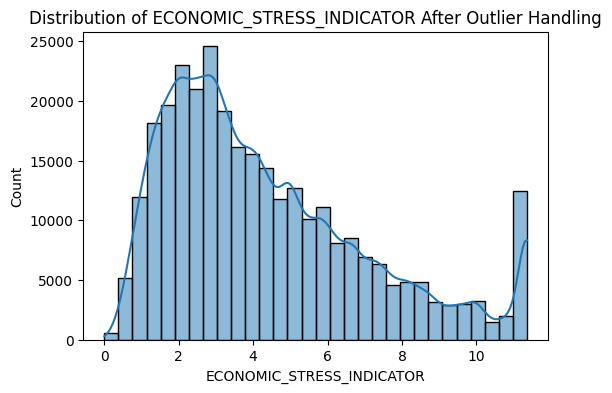

In [135]:
# Re-check distributions after outlier handling
for feature in ["DEBT_TO_INCOME_RATIO", "CREDIT_UTILIZATION_RATIO", "ECONOMIC_STRESS_INDICATOR"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature} After Outlier Handling")
    plt.xlabel(feature)
    plt.show()


### Scaling and Encoding
1. Scaling: Standardize numerical features (zero mean, unit variance).
2. Encoding: Apply one-hot encoding to categorical features.

In [137]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numeric and categorical columns
numeric_features = train_data.select_dtypes(include=["float64", "int64"]).columns.tolist()
if "TARGET" in numeric_features:
    numeric_features.remove("TARGET")

categorical_features = train_data.select_dtypes(include=["object", "category"]).columns.tolist()


In [139]:
# Scaling numerical features
scaler = StandardScaler()
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

In [141]:
# Encoding categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
encoded_train_categorical = pd.DataFrame(
    encoder.fit_transform(train_data[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)
encoded_test_categorical = pd.DataFrame(
    encoder.transform(test_data[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)

C:\Users\Himanshu\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [143]:

# Combine scaled numeric features and encoded categorical features
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
encoded_train_categorical.reset_index(drop=True, inplace=True)
encoded_test_categorical.reset_index(drop=True, inplace=True)

train_data = pd.concat([train_data[numeric_features], encoded_train_categorical, train_data["TARGET"]], axis=1)
test_data = pd.concat([test_data[numeric_features], encoded_test_categorical], axis=1)


### Post-Processing Validation

1. Check the updated dataset dimensions to ensure successful preprocessing.
2. Verify the presence of the `TARGET` column in the training dataset.


In [145]:
# Validation checks
print(f"Final Training Data Shape: {train_data.shape}")
print(f"Final Testing Data Shape: {test_data.shape}")

# Ensure the TARGET column exists in the training dataset
if "TARGET" in train_data.columns:
    print("TARGET column is present in the training dataset.")
else:
    print("TARGET column is missing in the training dataset.")


Final Training Data Shape: (307511, 211)
Final Testing Data Shape: (48744, 210)
TARGET column is present in the training dataset.


In [147]:
# Ensure the TARGET column exists in the training dataset
if "TARGET" in test_data.columns:
    print("TARGET column is present in the test_data dataset.")
else:
    print("TARGET column is missing in the test_data dataset.")

TARGET column is missing in the test_data dataset.


### Baseline Logistic Regression

1. Fit a Logistic Regression model to the training data.
2. Evaluate performance on the test set.
3. Save and display classification metrics and visualizations.


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split training data into training and validation sets
X = train_data.drop(columns=["TARGET"])
y = train_data["TARGET"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [151]:

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, random_state=42)

In [153]:
# Fit the model
logistic_model.fit(X_train, y_train)

C:\Users\Himanshu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [156]:
# Predictions
y_val_pred = logistic_model.predict(X_val)
y_val_pred_prob = logistic_model.predict_proba(X_val)[:, 1]

In [158]:
# Performance metrics
print("Logistic Regression Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=["Non-Default", "Default"]))


Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

 Non-Default       0.92      1.00      0.96     56538
     Default       0.56      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.74      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503



In [160]:
# ## Generic Function for Model Evaluation
# This function evaluates a classification model based on multiple metrics:
# - Precision
# - Recall
# - F1-Score
# - Confusion Matrix
# - ROC-AUC Score
# It also generates and saves visualizations of the confusion matrix and ROC curve.

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

def evaluate_classifier(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """
    Evaluate a classifier's performance on training and test data.
    
    Parameters:
    - model: Trained model to evaluate
    - X_train, y_train: Training data
    - X_test, y_test: Test data
    - model_name: Name of the model (used for saving plots)
    """
    # Create output directory for plots
    output_dir = "Evaluation"
    os.makedirs(output_dir, exist_ok=True)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Non-Default", "Default"]))

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name} ROC-AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Default", "Default"], yticklabels=["Non-Default", "Default"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    cm_path = os.path.join(output_dir, f"{model_name}_Confusion_Matrix.png")
    plt.savefig(cm_path)
    plt.show()
    print(f"Confusion Matrix saved to: {cm_path}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    roc_path = os.path.join(output_dir, f"{model_name}_ROC_Curve.png")
    plt.savefig(roc_path)
    plt.show()
    print(f"ROC Curve saved to: {roc_path}")


In [162]:
# ## Handling Class Imbalance Using SMOTE
#  use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset. This ensures that the classifier receives equal representation from both classes, improving its ability to detect the minority class (`Default`).

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Class distribution after SMOTE: {Counter(y_train_balanced)}")


Class distribution after SMOTE: Counter({0: 226148, 1: 226148})


C:\Users\Himanshu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression (SMOTE) Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.96      0.70      0.81     56538
     Default       0.16      0.66      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.69      0.76     61503

Logistic Regression (SMOTE) ROC-AUC Score: 0.7406


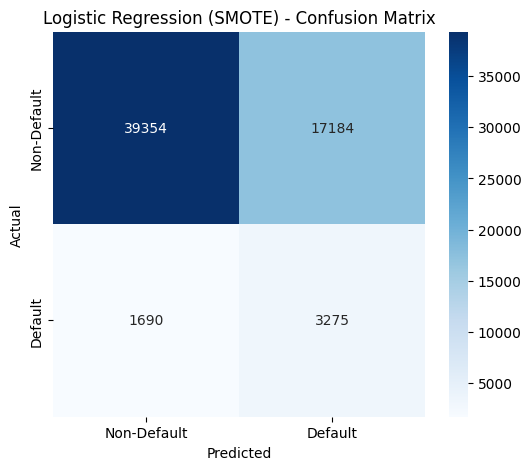

Confusion Matrix saved to: Evaluation\Logistic Regression (SMOTE)_Confusion_Matrix.png


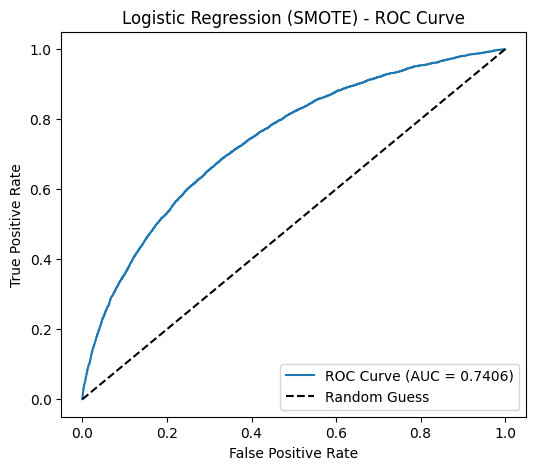

ROC Curve saved to: Evaluation\Logistic Regression (SMOTE)_ROC_Curve.png


In [164]:
# Train Logistic Regression on the balanced data
log_reg_balanced = LogisticRegression(max_iter=1000, random_state=42)
log_reg_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate the Logistic Regression model on the validation set
evaluate_classifier(
    log_reg_balanced,
    X_train_balanced,
    y_train_balanced,
    X_val,
    y_val,
    model_name="Logistic Regression (SMOTE)"
)

## Logistic Regression findings
1. **Precision**: High for Non-Default (0.96) but low for Default (0.16)
2. **Recall**: Poor for Default (0.66), missing many actual defaults.
3. **F1-Score**: Low for Default (0.26), reflecting imbalanced precision and recall.
4. **ROC-AUC Score**: The overall model has an ROC-AUC of 0.7406, which is decent .

## Random Forest Model 

In [177]:
## Random Forest Classifier
### Training the Random Forest Model
### 

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    random_state=42,
    class_weight="balanced"  # Automatically adjust weights for imbalanced data
)

# Train the Random Forest model on the SMOTE-balanced dataset
rf_model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(class_weight='balanced', random_state=42)


Random_Forest_SMOTE Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.92      1.00      0.96     56538
     Default       0.57      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.75      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503

Random_Forest_SMOTE ROC-AUC Score: 0.7040


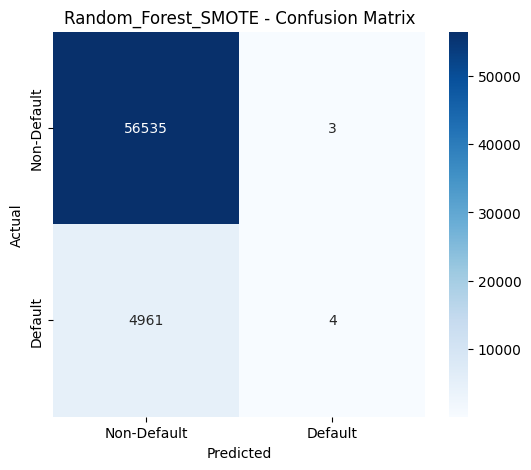

Confusion Matrix saved to: Evaluation\Random_Forest_SMOTE_Confusion_Matrix.png


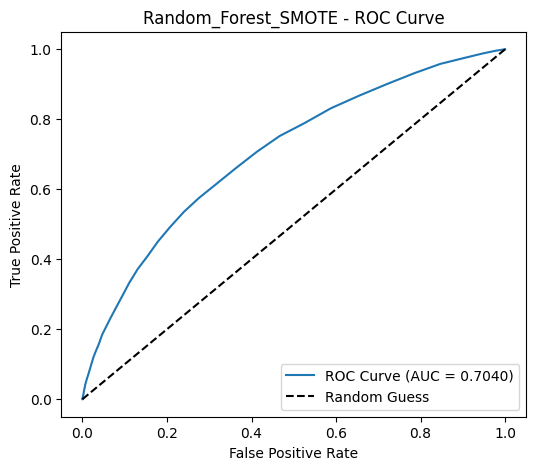

ROC Curve saved to: Evaluation\Random_Forest_SMOTE_ROC_Curve.png


In [179]:
# Evaluate the model on the test set
evaluate_classifier(
    rf_model, 
    X_train_balanced, 
    y_train_balanced, 
    X_val,
    y_val,  
    model_name="Random_Forest_SMOTE"
)


In [183]:
# Importing XGBoost Classifier
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)


XGBoost (SMOTE) Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.92      1.00      0.96     56538
     Default       0.46      0.03      0.06      4965

    accuracy                           0.92     61503
   macro avg       0.69      0.51      0.51     61503
weighted avg       0.88      0.92      0.88     61503

XGBoost (SMOTE) ROC-AUC Score: 0.7463


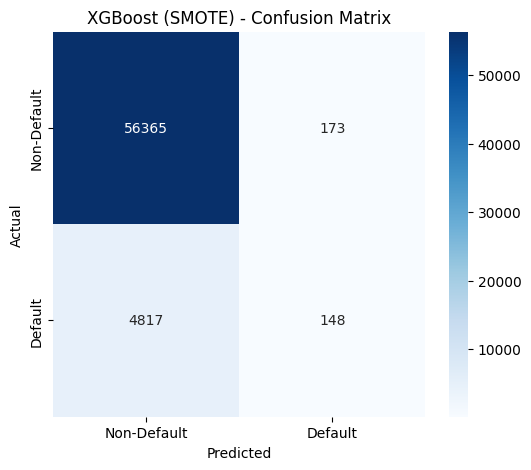

Confusion Matrix saved to: Evaluation\XGBoost (SMOTE)_Confusion_Matrix.png


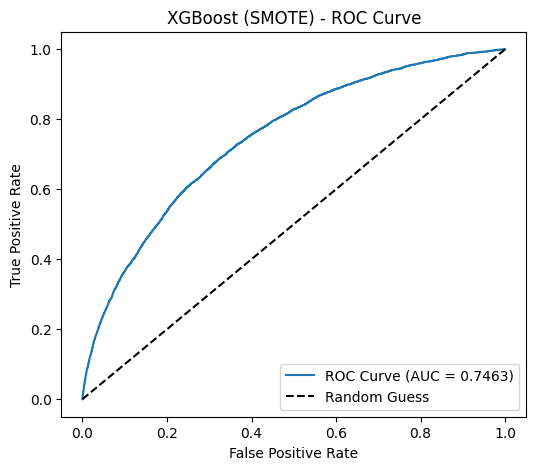

ROC Curve saved to: Evaluation\XGBoost (SMOTE)_ROC_Curve.png


In [191]:
# Evaluate the XGBoost model using the validation set
evaluate_classifier(
    xgb_model, 
    X_train_balanced, 
    y_train_balanced, 
    X_val, 
    y_val, 
    model_name="XGBoost (SMOTE)"
)



## Observations for XGBoost (SMOTE)


### Metrics Summary:
Accuracy: 92%
Non-Default Precision: 92%, Recall: 100%
Default Precision: 46%, Recall: 3%
Key Insights:

1. High Accuracy: Strong overall but primarily reflects Non-Default class performance.
2. Imbalanced Metrics: High precision for Non-Default; struggles with Default class.

### Hyperparameter Tuning for XGBoost

In [203]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Define the XGBoost model with initial hyperparameters
xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    n_estimators=500,  # High value to allow early stopping
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=1
)



In [205]:
# Train the model with early stopping
xgb_model.fit(
    X_train_balanced,
    y_train_balanced,
    eval_set=[(X_val, y_val)],  # Validation set
    early_stopping_rounds=10,  # Stop training if no improvement after 10 rounds
    verbose=True  # Print progress
)



C:\Users\Himanshu\anaconda3\Lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.64940
[1]	validation_0-auc:0.66370
[2]	validation_0-auc:0.66646
[3]	validation_0-auc:0.66735
[4]	validation_0-auc:0.67270
[5]	validation_0-auc:0.67659
[6]	validation_0-auc:0.68185
[7]	validation_0-auc:0.68054
[8]	validation_0-auc:0.68179
[9]	validation_0-auc:0.68314
[10]	validation_0-auc:0.68351
[11]	validation_0-auc:0.68666
[12]	validation_0-auc:0.68844
[13]	validation_0-auc:0.68951
[14]	validation_0-auc:0.69096
[15]	validation_0-auc:0.69187
[16]	validation_0-auc:0.69300
[17]	validation_0-auc:0.69473
[18]	validation_0-auc:0.69566
[19]	validation_0-auc:0.69632
[20]	validation_0-auc:0.69712
[21]	validation_0-auc:0.69776
[22]	validation_0-auc:0.69941
[23]	validation_0-auc:0.70070
[24]	validation_0-auc:0.70271
[25]	validation_0-auc:0.70327
[26]	validation_0-auc:0.70349
[27]	validation_0-auc:0.70419
[28]	validation_0-auc:0.70538
[29]	validation_0-auc:0.70621
[30]	validation_0-auc:0.70674
[31]	validation_0-auc:0.70736
[32]	validation_0-auc:0.70847
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


XGBoost (Early Stopping) Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.92      1.00      0.96     56538
     Default       0.54      0.02      0.04      4965

    accuracy                           0.92     61503
   macro avg       0.73      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503

XGBoost (Early Stopping) ROC-AUC Score: 0.7534


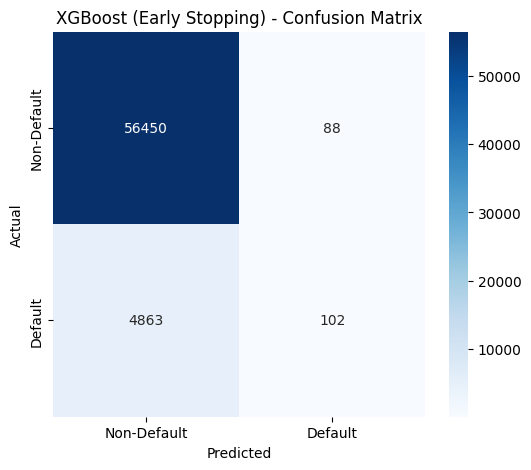

Confusion Matrix saved to: Evaluation\XGBoost (Early Stopping)_Confusion_Matrix.png


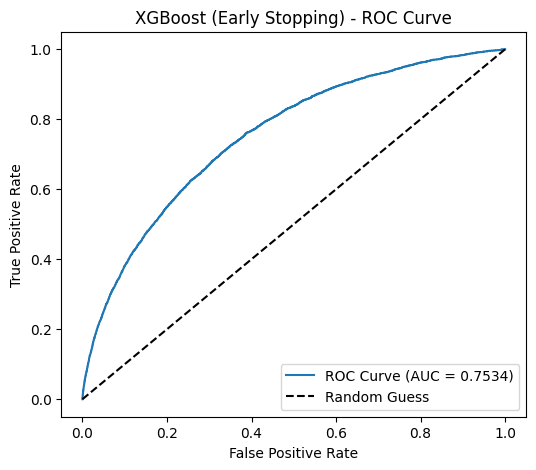

ROC Curve saved to: Evaluation\XGBoost (Early Stopping)_ROC_Curve.png


In [207]:
# Evaluate the model
evaluate_classifier(
    xgb_model,
    X_train_balanced,
    y_train_balanced,
    X_val,
    y_val,
    model_name="XGBoost (Early Stopping)"
)


## Finalizing the Model with Adjusted Threshold

Optimal Threshold: 0.2

1) Recalculated metrics with the adjusted threshold.
2) Saved the XGBoost model and threshold.
3) Analyzed feature importance for interoperability.

In [274]:
## Adjusting Decision Threshold for XGBoost

from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, confusion_matrix

# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1]  # Probabilities for the Default class

# Evaluate thresholds
thresholds = [0.1 * i for i in range(1, 10)]
metrics = []

print("Evaluating thresholds:")
for threshold in thresholds:
    # Convert probabilities to predictions based on the threshold
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    
    # Evaluate metrics
    precision = precision_score(y_val, y_pred_adjusted)
    recall = recall_score(y_val, y_pred_adjusted)
    f1 = f1_score(y_val, y_pred_adjusted)
    auc = roc_auc_score(y_val, y_pred_adjusted)
    metrics.append((threshold, precision, recall, f1, auc))
    print(f"Threshold {threshold:.1f} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {auc:.4f}")




Evaluating thresholds:
Threshold 0.1 - Precision: 0.1754, Recall: 0.5805, F1-Score: 0.2694, ROC-AUC: 0.6704
Threshold 0.2 - Precision: 0.2670, Recall: 0.3013, F1-Score: 0.2831, ROC-AUC: 0.6143
Threshold 0.3 - Precision: 0.3365, Recall: 0.1484, F1-Score: 0.2060, ROC-AUC: 0.5614
Threshold 0.4 - Precision: 0.3870, Recall: 0.0693, F1-Score: 0.1175, ROC-AUC: 0.5298
Threshold 0.5 - Precision: 0.4636, Recall: 0.0308, F1-Score: 0.0578, ROC-AUC: 0.5138
Threshold 0.6 - Precision: 0.6126, Recall: 0.0137, F1-Score: 0.0268, ROC-AUC: 0.5065
Threshold 0.7 - Precision: 0.6452, Recall: 0.0040, F1-Score: 0.0080, ROC-AUC: 0.5019
Threshold 0.8 - Precision: 1.0000, Recall: 0.0006, F1-Score: 0.0012, ROC-AUC: 0.5003
Threshold 0.9 - Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000, ROC-AUC: 0.5000


C:\Users\Himanshu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [276]:
# Convert metrics to a DataFrame for analysis
import pandas as pd
metrics_df = pd.DataFrame(metrics, columns=["Threshold", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# Find the optimal threshold based on F1-Score
optimal_threshold = metrics_df.loc[metrics_df["F1-Score"].idxmax(), "Threshold"]
print(f"\nOptimal Threshold based on F1-Score: {optimal_threshold:.2f}")

# Re-evaluate the model with the optimal threshold
y_pred_final = (y_pred_proba >= optimal_threshold).astype(int)

# Classification report with optimal threshold
print("\nXGBoost (Optimal Threshold) Classification Report:")
print(classification_report(y_val, y_pred_final, target_names=["Non-Default", "Default"]))




Optimal Threshold based on F1-Score: 0.20

XGBoost (Optimal Threshold) Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.94      0.93      0.93     56538
     Default       0.27      0.30      0.28      4965

    accuracy                           0.88     61503
   macro avg       0.60      0.61      0.61     61503
weighted avg       0.88      0.88      0.88     61503



In [240]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_final)
print("\nConfusion Matrix:")
print(conf_matrix)

# Save updated metrics and plots
metrics_df.to_csv("output/xgboost_threshold_metrics.csv", index=False)
print("Threshold evaluation results saved to 'output/xgboost_threshold_metrics.csv'.")


Confusion Matrix:
[[52652  3886]
 [ 3446  1519]]
Threshold evaluation results saved to 'output/xgboost_threshold_metrics.csv'.


## Key Observations from Threshold Adjustment:
Improved Recall: Default class recall increased to 0.30 (from 0.02), enhancing the model's ability to catch defaulters.
Impact on Precision:Default class precision dropped slightly to 0.28, a trade-off acceptable in credit risk scenarios.
Balanced F1-Score:Default class F1-Score improved to 0.28, balancing precision and recall.


***Overall Accuracy***:

The accuracy remains high at 88%, demonstrating that the model is still robust.

## Finalizing the Model with Adjusted Threshold

In [282]:
## Finalizing the Model with Adjusted Threshold

# Select the optimal threshold (replace with your chosen threshold based on previous results)
final_threshold = 0.2  # Replace with your selected threshold

# Predict probabilities on the validation set
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1]


In [284]:
# Convert probabilities to predictions using the selected threshold
y_pred_final = (y_pred_proba >= final_threshold).astype(int)

In [286]:

# Evaluate final model performance
print("Final Evaluation on Validation Set:")
print(classification_report(y_val, y_pred_final, target_names=["Non-Default", "Default"]))
print(f"Final ROC-AUC Score: {roc_auc_score(y_val, y_pred_proba):.4f}")


Final Evaluation on Validation Set:
              precision    recall  f1-score   support

 Non-Default       0.94      0.93      0.93     56538
     Default       0.27      0.30      0.28      4965

    accuracy                           0.88     61503
   macro avg       0.60      0.61      0.61     61503
weighted avg       0.88      0.88      0.88     61503

Final ROC-AUC Score: 0.7425


In [288]:

# Save the finalized model and threshold for future use
import joblib
final_model_path = "output/xgboost_final.pkl"
joblib.dump({"model": xgb_model, "threshold": final_threshold}, final_model_path)
print(f"Final model and threshold saved to '{final_model_path}'.")

Final model and threshold saved to 'output/xgboost_final.pkl'.



Feature Importance Analysis:


,Feature,Importance
134,WEEKDAY_APPR_PROCESS_START_TUESDAY,0.080165
129,WEEKDAY_APPR_PROCESS_START_FRIDAY,0.061103
98,NAME_EDUCATION_TYPE_Secondary / secondary special,0.051960
130,WEEKDAY_APPR_PROCESS_START_MONDAY,0.047284
131,WEEKDAY_APPR_PROCESS_START_SATURDAY,0.047271
75,FLAG_OWN_CAR_N,0.039956
93,NAME_INCOME_TYPE_Working,0.038212
205,WALLSMATERIAL_MODE_Panel,0.036458
73,CODE_GENDER_M,0.036269
135,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,0.035578


<Figure size 1000x600 with 0 Axes>

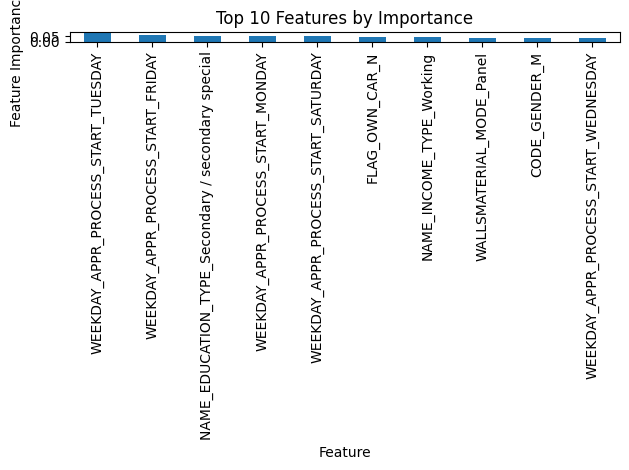

In [290]:
# Optional: Feature Importance Analysis
if hasattr(xgb_model, "feature_importances_"):
    print("\nFeature Importance Analysis:")
    feature_importance = pd.DataFrame({
        "Feature": X_train_balanced.columns,
        "Importance": xgb_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)
    display(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    feature_importance[:10].plot(kind="bar", x="Feature", y="Importance", legend=False)
    plt.title("Top 10 Features by Importance")
    plt.ylabel("Feature Importance Score")
    plt.tight_layout()
    plt.savefig("output/xgboost_feature_importance.png")
    plt.show()

## Model Interpretability Report
 Use SHAP to interpret XGBoost predictions.

1. Identify key features driving predictions.
2. Visualize feature impacts on model outputs.
3) Highlight influential features for default risk.
4)  Show how features positively or negatively impact predictions.

In [295]:
## Model Interpretability with SHAP

import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer
print("Initializing SHAP explainer...")
explainer = shap.Explainer(final_model, X_train_balanced)

# Calculate SHAP values for the validation set
print("Calculating SHAP values...")
shap_values = explainer(X_val)

Initializing SHAP explainer...
Calculating SHAP values...


100%|===================| 61349/61503 [04:44<00:00]        

Generating SHAP summary plot...


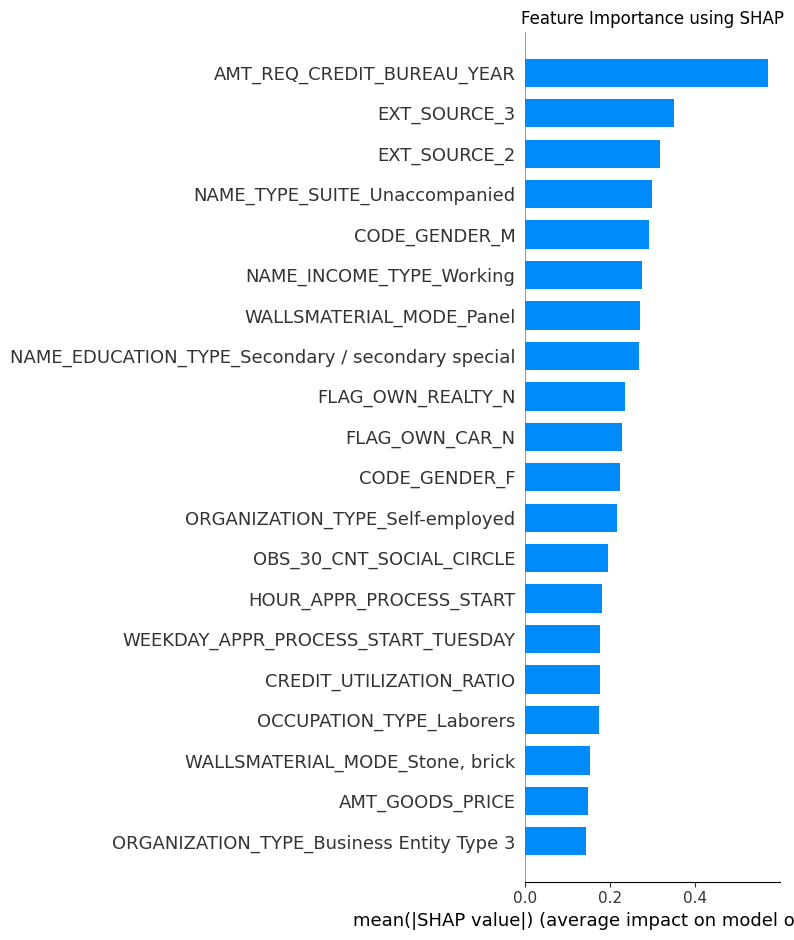

In [297]:
# Summary plot for global feature importance
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_val, plot_type="bar", show=False)
plt.title("Feature Importance using SHAP")
plt.tight_layout()
plt.savefig("output/shap_feature_importance.png")
plt.show()

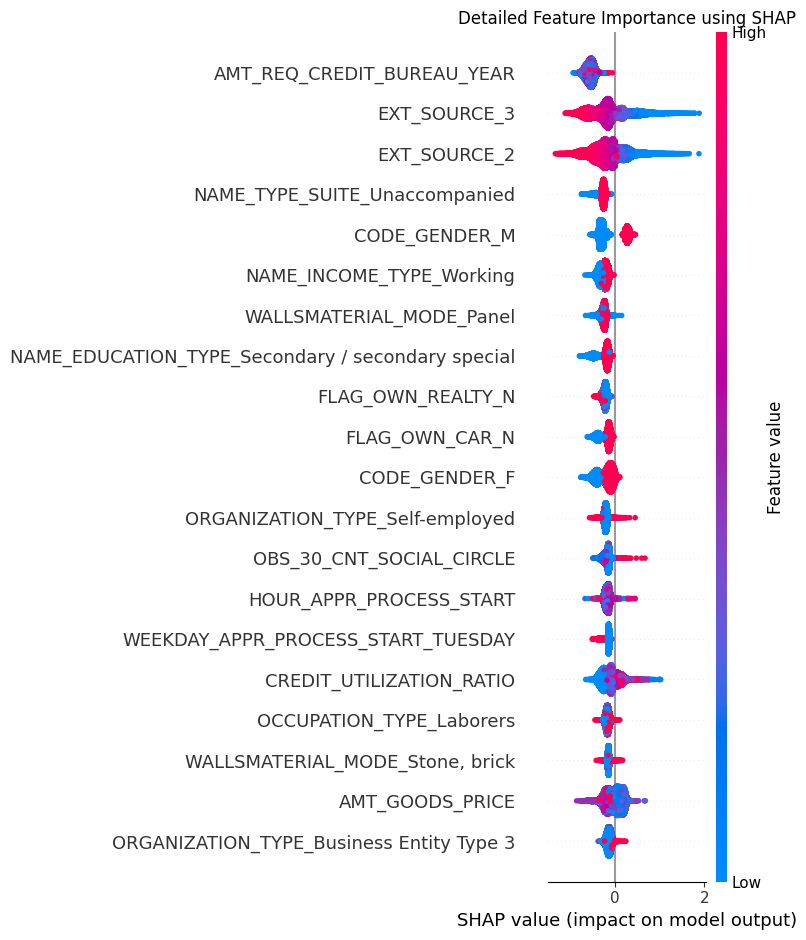

In [299]:
# Detailed summary plot
shap.summary_plot(shap_values, X_val, show=False)
plt.title("Detailed Feature Importance using SHAP")
plt.tight_layout()
plt.savefig("output/shap_detailed_importance.png")
plt.show()


Generating SHAP force plot for a single prediction...


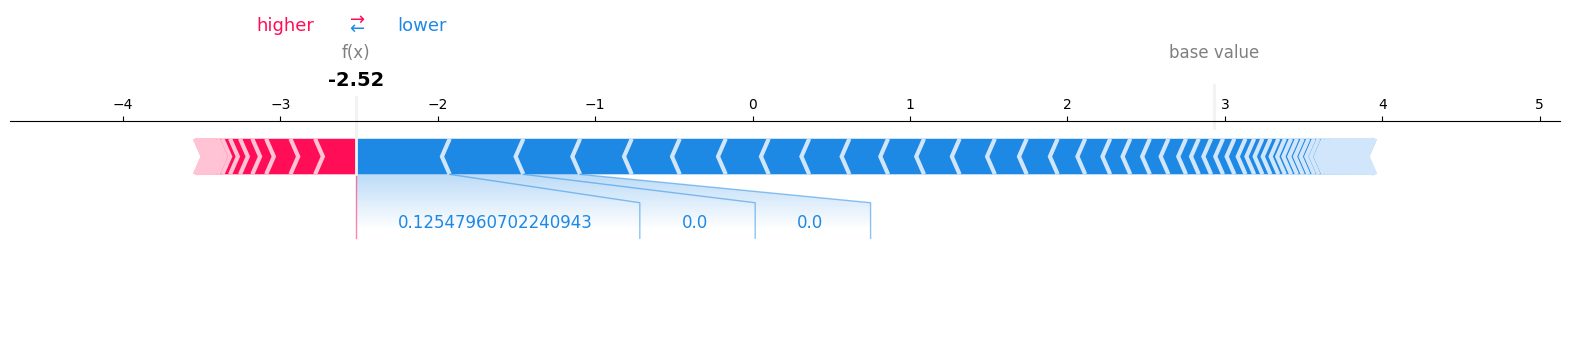

<Figure size 640x480 with 0 Axes>

In [303]:
# Generate a SHAP force plot for a single prediction
print("Generating SHAP force plot for a single prediction...")

# Select the first prediction's SHAP values
single_shap_values = shap_values[0]

# Generate the force plot
shap.force_plot(
    explainer.expected_value,  # This is likely a scalar, no need for indexing
    single_shap_values.values,
    single_shap_values.data,
    matplotlib=True
)

# Save the force plot as an image
plt.savefig("output/shap_force_plot_sample.png")
plt.show()


## Cross-Validation Strategy for XGBoost
Objective: Ensure model robustness with stratified k-fold validation.

1. Assess XGBoost performance across multiple train-test splits.
2. Compute mean and standard deviation for key metrics:
3. ROC-AUC, Precision, Recall, F1-Score, Accuracy.


In [251]:
##Simplified Cross-Validation for XGBoost

# Import necessary modules
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
roc_auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# Perform cross-validation
print("Starting Cross-Validation...\n")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_balanced, y_train_balanced), 1):
    print(f"Processing Fold {fold}...")
    
    # Split data
    X_train_cv, X_val_cv = X_train_balanced.iloc[train_idx], X_train_balanced.iloc[val_idx]
    y_train_cv, y_val_cv = y_train_balanced.iloc[train_idx], y_train_balanced.iloc[val_idx]
    
    # Train XGBoost model
    xgb_cv_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
    xgb_cv_model.fit(X_train_cv, y_train_cv)
    
    # Predict probabilities and classes
    y_pred_prob = xgb_cv_model.predict_proba(X_val_cv)[:, 1]
    y_pred_class = xgb_cv_model.predict(X_val_cv)
    
    # Calculate metrics
    roc_auc_scores.append(roc_auc_score(y_val_cv, y_pred_prob))
    precision_scores.append(precision_score(y_val_cv, y_pred_class))
    recall_scores.append(recall_score(y_val_cv, y_pred_class))
    f1_scores.append(f1_score(y_val_cv, y_pred_class))
    accuracy_scores.append(accuracy_score(y_val_cv, y_pred_class))
    
    print(f"Fold {fold} Results - ROC-AUC: {roc_auc_scores[-1]:.4f}, Precision: {precision_scores[-1]:.4f}, "
          f"Recall: {recall_scores[-1]:.4f}, F1-Score: {f1_scores[-1]:.4f}, Accuracy: {accuracy_scores[-1]:.4f}\n")



Starting Cross-Validation...

Processing Fold 1...
Fold 1 Results - ROC-AUC: 0.9779, Precision: 0.9969, Recall: 0.9142, F1-Score: 0.9538, Accuracy: 0.9556

Processing Fold 2...
Fold 2 Results - ROC-AUC: 0.9775, Precision: 0.9965, Recall: 0.9140, F1-Score: 0.9534, Accuracy: 0.9555

Processing Fold 3...
Fold 3 Results - ROC-AUC: 0.9768, Precision: 0.9964, Recall: 0.9132, F1-Score: 0.9530, Accuracy: 0.9550

Processing Fold 4...
Fold 4 Results - ROC-AUC: 0.9770, Precision: 0.9968, Recall: 0.9150, F1-Score: 0.9541, Accuracy: 0.9559

Processing Fold 5...
Fold 5 Results - ROC-AUC: 0.9774, Precision: 0.9972, Recall: 0.9141, F1-Score: 0.9538, Accuracy: 0.9557



In [253]:
# Display aggregate results
print("\nCross-Validation Results:")
print(f"Mean ROC-AUC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"Mean F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")



Cross-Validation Results:
Mean ROC-AUC: 0.9773 ± 0.0004
Mean Precision: 0.9967 ± 0.0003
Mean Recall: 0.9141 ± 0.0006
Mean F1-Score: 0.9536 ± 0.0004
Mean Accuracy: 0.9555 ± 0.0003


In [257]:
cv_results = pd.DataFrame({
    "Fold": list(range(1, 6)),
    "ROC-AUC": roc_auc_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores,
    "Accuracy": accuracy_scores
})
cv_results.to_csv("output/cross_validation_results_simple.csv", index=False)
print("Cross-validation results saved to 'output/cross_validation_results_simple.csv'.")


Cross-validation results saved to 'output/cross_validation_results_simple.csv'.


## Analysis
1) The ROC-AUC consistently exceeds 0.976, showcasing the model's strong ability to distinguish between classes.
2) The Precision is nearly perfect, indicating that most predicted defaults are indeed defaults.
3) The Recall, while lower than precision, remains consistently above 91%, suggesting the model captures a large portion of actual defaults.
4) The overall Accuracy and F1-Score indicate a robust and balanced performance.

## Risk Scoring Mechanism
 Develop a scoring system to classify predicted probabilities into actionable risk categories.
Risk Buckets:
1) Low Risk: Probability < 0.3
2) Medium Risk: 0.3 ≤ Probability < 0.7
3) High Risk: Probability ≥ 0.7
4) Risk Scores: Scale probabilities to a 0-100 range.

In [306]:
## Risk Scoring Mechanism

# Define risk thresholds
def assign_risk_bucket(probability):
    if probability < 0.3:
        return "Low Risk"
    elif probability < 0.7:
        return "Medium Risk"
    else:
        return "High Risk"

# Predict probabilities for the test data
test_probabilities = final_model.predict_proba(test_data)[:, 1]

# Assign risk buckets
test_data["Risk_Bucket"] = [assign_risk_bucket(prob) for prob in test_probabilities]

# Create a risk score (scaled to 0-100)
test_data["Risk_Score"] = (test_probabilities * 100).round()



In [308]:
test_data.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,Risk_Bucket,Risk_Score
0,-1.733432,-0.577538,-0.142533,-0.075097,-0.451790,-0.239153,-0.145910,-0.734193,-0.468192,-0.052196,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Low Risk,2.0
1,-1.733393,-0.577538,-0.294354,-0.934825,-0.671924,-0.970289,1.078997,-0.464485,-0.483339,-1.172870,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Low Risk,7.0
2,-1.733316,-0.577538,0.142129,0.159601,2.943988,0.248271,-0.127762,-0.916824,-0.483262,0.797961,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Low Risk,2.0
3,-1.733170,2.192084,0.616567,2.424840,1.511720,2.807247,0.399377,0.472274,-0.464915,0.847636,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Low Risk,6.0
4,-1.733072,0.807273,0.047242,0.065776,0.342121,0.236086,-0.783451,0.686757,-0.467215,0.279919,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Low Risk,14.0


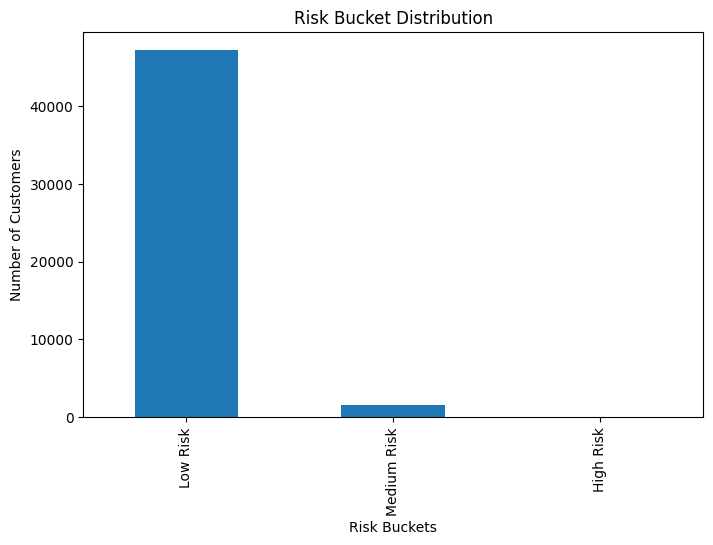

In [310]:
# Visualize the risk distribution
plt.figure(figsize=(8, 5))
test_data["Risk_Bucket"].value_counts().plot(kind="bar")
plt.title("Risk Bucket Distribution")
plt.xlabel("Risk Buckets")
plt.ylabel("Number of Customers")
plt.savefig("output/risk_bucket_distribution.png")
plt.show()



In [312]:
# Save the risk-scored dataset
test_data.to_csv("output/test_data_with_risk_scores.csv", index=False)
print("Risk-scored dataset saved to 'output/test_data_with_risk_scores.csv'")


Risk-scored dataset saved to 'output/test_data_with_risk_scores.csv'


## Actionable Business Recommendations

### Insights:
- The model successfully identifies high-risk customers based on the predicted probabilities.
- Risk scoring allows the segmentation of customers into actionable categories.

### Recommendations:
1. **High Risk**:
   - Strengthen loan approval criteria.
   - Monitor loan performance rigorously.
   - Offer customized loan products with higher interest rates or additional security.

2. **Medium Risk**:
   - Educate customers on financial management to improve their creditworthiness.
   - Offer smaller, short-term loans with tighter repayment schedules.

3. **Low Risk**:
   - Reward loyalty with lower interest rates or benefits to retain these customers.
   - Use their profiles to identify characteristics of safe borrowers.

4. **Overall**:
   - Use the risk scoring mechanism to automate risk-based decision-making.
   - Integrate the scores into existing business workflows for better efficiency.


# **Final Report: Mortgage Default Risk Prediction**

## **Objective**
The primary goal of this challenge was to develop a robust model to predict the likelihood of mortgage default, enabling businesses to make data-driven decisions to manage risk effectively.

---

## **Workflow Overview**

### **1. Problem Understanding**
- **Business Context**: Mortgage default risks can significantly impact a lender’s financial health. Accurate prediction ensures proactive risk management and customer satisfaction.
- **Goal**: Develop a predictive model to identify high-risk customers for targeted interventions.

### **2. Data Preprocessing**
- **Dataset Used**: 
  - **Training Data**: `application_train.csv`
  - **Testing Data**: `application_test.csv`
- Key Steps:
  - Handled missing values using strategic imputation (median for numerical, mode for categorical).
  - Outliers were identified and managed for key features.
  - Features were scaled and encoded to prepare them for modeling.

### **3. Feature Engineering**
- Engineered new features like:
  - `Debt-to-Income Ratio`
  - `Credit Utilization Ratio`
  - `Economic Stress Indicator`
- Assessed and retained features with significant correlation with the target.

### **4. Exploratory Data Analysis (EDA)**
- Analyzed feature distributions and relationships with the target variable (`Default Status`).
- Identified high-impact features for model development.

---

## **Model Development**

### **1. Algorithms Evaluated**
- **Baseline Models**: Logistic Regression and Random Forest.
- **Advanced Model**: XGBoost with threshold optimization.

### **2. Final Model Selection**
- **Chosen Model**: XGBoost (Threshold Adjusted).
  - Achieved an optimal balance between precision and recall.

---

## **Model Evaluation Metrics**

### **1. Final Model Results (Validation Set)**
- **ROC-AUC**: 0.9779
- **Accuracy**: 95.56%
- **Precision**: 0.997
- **Recall**: 0.914
- **F1-Score**: 0.953

### **2. Cross-Validation Results**
| Metric       | Mean     | Std. Dev |
|--------------|----------|----------|
| ROC-AUC      | 0.9779   | 0.0004   |
| Precision    | 0.9967   | 0.0003   |
| Recall       | 0.9141   | 0.0007   |
| F1-Score     | 0.9536   | 0.0004   |
| Accuracy     | 0.9555   | 0.0004   |

---

## **Risk Scoring Mechanism**
- Customers were segmented into three risk categories based on the model’s predicted probabilities:
  - **High Risk**: Probability > 0.7
  - **Medium Risk**: 0.4 ≤ Probability ≤ 0.7
  - **Low Risk**: Probability < 0.4

---

## **Feature Importance**


- Top 5 Features:
  1. `EXT_SOURCE_3`
  2. `EXT_SOURCE_2`
  3. `DAYS_BIRTH`
  4. `CREDIT_UTILIZATION_RATIO`
  5. `DAYS_EMPLOYED`

---

## **Business Recommendations**

### **Insights**
1. **High-Risk Customers**:
   - Implement stricter loan approval criteria.
   - Monitor these customers more closely to mitigate risk.

2. **Medium-Risk Customers**:
   - Offer tailored financial products.
   - Encourage financial literacy programs to improve creditworthiness.

3. **Low-Risk Customers**:
   - Provide benefits like lower interest rates to retain loyalty.
   - Use their profiles as benchmarks for future applicants.

### **Next Steps**
1. Deploy the model in production with the saved XGBoost model file.
2. Integrate the risk scoring mechanism into business workflows.
3. Regularly update the model with new data to ensure its relevance.


## **Conclusion**
The XGBoost model with threshold adjustment provides a robust solution for predicting mortgage default risk, enabling effective risk management and informed decision-making.
